In [1]:
import json
import folium
import pandas as pd
import requests
import branca
import matplotlib.image as mpimg
from folium.features import CustomIcon
import matplotlib.pyplot as plt

In [242]:
sensor = pd.read_csv('sensors.csv')

In [233]:
sensor

,sensor_name,latitude,longitude,app_id,dev_id,install_time,adress,number,zip_code,city,status,activity,additional_details,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Elsys ELT2,60.5790,15.0652,campusborlangeelsys,a81758fffe0459fd,19-10-19 19:54,Gagnefsbyn,33,78400,Gagnef,OK,"AccMotion, humidity, pressure, temperature, vd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Elsys ELT2,60.4886,15.3883,campusborlangeelsys,a81758fffe0459fe,19-10-19 19:54,Mats knuts vag,68,78450,Borlange,OK,"AccMotion, humidity, pressure, temperature, vd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Elsys ERS CO2,60.4878,15.4088,campusborlangeelsys,a81758fffe045fa4,19-10-19 20:54,Roda vagen,3,78400,Borlange,OK,"CO2, humidity, light, motion, temperature, vdd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Elsys ERS CO2,60.4877,15.4092,campusborlangeelsys,a81758fffe045fa5,19-10-19 20:54,Roda vagen,3,78400,Borlange,OK,"CO2, humidity, light, motion, temperature, vdd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ESP32,60.4887,15.3883,hajo66-test,paxcounter_1,19-11-19 20:54,Mats knuts vag,68,78450,Borlange,OK,PaxCounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ESP32,60.4888,15.3883,hajo66-test,weatherstation_1,19-11-19 20:54,Mats knuts vag,68,78450,Borlange,OK,"humidity, pressure, temperature",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arduino,60.4877,15.4090,hajo66-test,arduino_1,19-10-01 20:54,Roda vagen,3,78400,Borlange,FAIL,MQTT-test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
center = [60.5790, 15.0652]
map = folium.Map(location=center, zoom_start=8)
map

In [234]:
for index, sensor in sensor.iterrows():
    location = [sensor['latitude'], sensor['longitude']]
    folium.Marker(location, popup = f'sensor_name:{sensor["sensor_name"]}\n app_id:{sensor["app_id"]}\n \
    install_time:{sensor["install_time"]}\n adress:{sensor["adress"]}\n \
    number:{sensor["number"]}\n zip_code:{sensor["zip_code"]}\n \
    city:{sensor["city"]}\n status:{sensor["status"]}\n activity:{sensor["activity"]}',icon=folium.Icon(color="green")).add_to(map)

# save map to html file
# map.save('index.html')
map

In [6]:
map.save('index.html')

In [244]:
map1 = folium.Map(location=center, zoom_start=10)

In [245]:
kw = {"prefix": "fa", "color": "green", "icon": "arrow-up"}

In [246]:
sensor['latitude']

0    60.5790
1    60.4886
2    60.4878
3    60.4877
4    60.4887
5    60.4888
6    60.4877
Name: latitude, dtype: float64

In [247]:
angle = 45
icon = folium.Icon(angle=angle, **kw)
location0 = [sensor['latitude'][0], sensor['longitude'][0]]
folium.Marker(location0, popup = f'sensor_name:{sensor["sensor_name"][0]}\n app_id:{sensor["app_id"][0]}\n \
install_time:{sensor["install_time"][0]}\n adress:{sensor["adress"][0]}\n \
number:{sensor["number"][0]}\n zip_code:{sensor["zip_code"][0]}\n \
city:{sensor["city"][0]}\n status:{sensor["status"][0]}\n activity:{sensor["activity"][0]}',icon=icon, tooltip=str(angle)).add_to(map1)

location1 = [sensor['latitude'][1], sensor['longitude'][1]]
folium.Marker(location1, popup = f'sensor_name:{sensor["sensor_name"][1]}\n app_id:{sensor["app_id"][1]}\n \
install_time:{sensor["install_time"][1]}\n adress:{sensor["adress"][1]}\n \
number:{sensor["number"][1]}\n zip_code:{sensor["zip_code"][1]}\n \
city:{sensor["city"][1]}\n status:{sensor["status"][1]}\n activity:{sensor["activity"][1]}',icon=folium.Icon(color="green")).add_to(map1)

location2 = [sensor['latitude'][2], sensor['longitude'][2]]
folium.Marker(location2, popup = f'sensor_name:{sensor["sensor_name"][2]}\n app_id:{sensor["app_id"][2]}\n \
install_time:{sensor["install_time"][2]}\n adress:{sensor["adress"][2]}\n \
number:{sensor["number"][2]}\n zip_code:{sensor["zip_code"][2]}\n \
city:{sensor["city"][2]}\n status:{sensor["status"][2]}\n activity:{sensor["activity"][2]}',icon=folium.Icon(color="red", icon="info-sign")).add_to(map1)

location3 = [sensor['latitude'][3], sensor['longitude'][3]]
folium.Marker(location3, popup = f'sensor_name:{sensor["sensor_name"][3]}\n app_id:{sensor["app_id"][3]}\n \
install_time:{sensor["install_time"][3]}\n adress:{sensor["adress"][3]}\n \
number:{sensor["number"][3]}\n zip_code:{sensor["zip_code"][3]}\n \
city:{sensor["city"][3]}\n status:{sensor["status"][3]}\n activity:{sensor["activity"][3]}',icon=folium.Icon(color='red', icon='envelope')).add_to(map1)

angle = 90
icon = folium.Icon(angle=angle, **kw)
location4 = [sensor['latitude'][4], sensor['longitude'][4]]
folium.Marker(location4, popup = f'sensor_name:{sensor["sensor_name"][4]}\n app_id:{sensor["app_id"][4]}\n \
install_time:{sensor["install_time"][4]}\n adress:{sensor["adress"][4]}\n \
number:{sensor["number"][4]}\n zip_code:{sensor["zip_code"][4]}\n \
city:{sensor["city"][4]}\n status:{sensor["status"][4]}\n activity:{sensor["activity"][4]}',icon=icon, tooltip=str(angle)).add_to(map1)

angle = 180
icon = folium.Icon(angle=angle, **kw)
location5 = [sensor['latitude'][5], sensor['longitude'][5]]
folium.Marker(location5, popup = f'sensor_name:{sensor["sensor_name"][5]}\n app_id:{sensor["app_id"][5]}\n \
install_time:{sensor["install_time"][5]}\n adress:{sensor["adress"][5]}\n \
number:{sensor["number"][5]}\n zip_code:{sensor["zip_code"][5]}\n \
city:{sensor["city"][5]}\n status:{sensor["status"][5]}\n activity:{sensor["activity"][5]}',icon=icon, tooltip=str(angle)).add_to(map1)


location6 = [sensor['latitude'][6], sensor['longitude'][6]]
folium.Marker(location6, popup = f'sensor_name:{sensor["sensor_name"][6]}\n app_id:{sensor["app_id"][6]}\n \
install_time:{sensor["install_time"][6]}\n adress:{sensor["adress"][6]}\n \
number:{sensor["number"][6]}\n zip_code:{sensor["zip_code"][6]}\n \
city:{sensor["city"][6]}\n status:{sensor["status"][6]}\n activity:{sensor["activity"][6]}',icon=folium.Icon(icon="cloud")).add_to(map1)

map1

In [248]:
map1.save("csv.html")

In [3]:
response = requests.get("https://www.thethingsnetwork.org/gateway-data/location?latitude=60.48746&amp;longitude=15.409658&amp;distance=200000")
todos = json.loads(response.text)

In [4]:
todos

{'akersberga_1': {'id': 'akersberga_1',
  'description': 'Things Network Gateway i Åkersberga, Runö Gård',
  'owner': 'nicolas_innocenti',
  'owners': ['nicolas_innocenti'],
  'location': {'latitude': 59.48198465,
   'longitude': 18.28747217,
   'altitude': 15},
  'country_code': 'se',
  'attributes': {'antenna_model': 'The one included in the box',
   'brand': 'The Things Products',
   'frequency_plan': 'EU_863_870',
   'model': 'The Things Gateway',
   'placement': 'indoor',
   'version': 'v1.0.8-846da98b'},
  'last_seen': '2021-04-23T15:25:40Z'},
 'bifrost': {'id': 'bifrost',
  'location': {'latitude': 59.29041045,
   'longitude': 17.9518368,
   'altitude': 50},
  'country_code': 'se',
  'attributes': {'antenna_model': 'https://www.kjell.com/se/sortiment/dator-natverk/natverk/mobilt-bredband/antenn/4g-antenn/midimag-4g-antenn-7-8-dbi-p30064',
   'brand': 'The Things Products',
   'frequency_plan': 'EU_863_870',
   'model': 'The Things Gateway',
   'placement': 'outdoor',
   'version

In [5]:
type(todos)

dict

# file

In [153]:
todosd = pd.DataFrame.from_dict(todos, orient='index')

In [135]:
todosd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, akersberga_1 to tbg-ttn-gw-1
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            56 non-null     object
 1   description   50 non-null     object
 2   owner         42 non-null     object
 3   owners        42 non-null     object
 4   location      56 non-null     object
 5   country_code  55 non-null     object
 6   attributes    56 non-null     object
 7   last_seen     55 non-null     object
dtypes: object(8)
memory usage: 3.9+ KB


In [154]:
todosd=pd.concat([todosd.drop(['location'], axis=1), todosd['location'].apply(pd.Series)],axis=1)
todosd=pd.concat([todosd.drop(['attributes'], axis=1), todosd['attributes'].apply(pd.Series)],axis=1)

In [155]:
todosd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, akersberga_1 to tbg-ttn-gw-1
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              56 non-null     object 
 1   description     50 non-null     object 
 2   owner           42 non-null     object 
 3   owners          42 non-null     object 
 4   country_code    55 non-null     object 
 5   last_seen       55 non-null     object 
 6   latitude        56 non-null     float64
 7   longitude       56 non-null     float64
 8   altitude        56 non-null     float64
 9   antenna_model   21 non-null     object 
 10  brand           49 non-null     object 
 11  frequency_plan  56 non-null     object 
 12  model           41 non-null     object 
 13  placement       50 non-null     object 
 14  version         12 non-null     object 
dtypes: float64(3), object(12)
memory usage: 7.0+ KB


In [82]:
import base64
from io import BytesIO
encoded = base64.b64encode(open('gateway.png', 'rb').read())
decoded = base64.b64decode(encoded)
# icon_url = BytesIO(decoded)
icon = folium.features.CustomIcon(icon_url, icon_size=(50,50))

TypeError: Object of type BytesIO is not JSON serializable

In [37]:
import os

In [38]:
icon = BytesIO(base64.b64decode(base64.b64encode(open(os.path.join(os.getcwd(),"gateway.png"), 'rb').read())))

In [39]:
icon

In [108]:
icon_image = mpimg.imread("gateway.png")
# shadow_image = url("leaf-shadow.png")
icon = folium.features.CustomIcon(icon_image,icon_size=(28, 30))

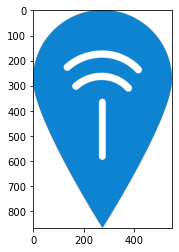

In [78]:
plt.imshow(icon_image)

In [88]:
json.dumps(icon)

TypeError: Object of type CustomIcon is not JSON serializable

In [89]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('gateway.png')
# convert image to numpy array
data = asarray(image)

In [94]:
import base64
  
  
with open('gateway.png', "rb") as image2string:
    converted_string = base64.b64encode(image2string.read())
print(converted_string)
ab =base64.b64decode((converted_string))

b'iVBORw0KGgoAAAANSUhEUgAAAioAAANjCAYAAACEEDGjAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAEi2SURBVHhe7d1drF3pWSf4tfZxQkGVY0dCk3SapBxGCUjTlOtcDHMBCVWj6VwQQlddcBEiRJXUaAjqEVXSSMAotst2JNISUlVJrYQRSHHUgtZ0LuoQAhcwmnIIuYCbY1dA6iSajitBQI0yEzu2Q4WcvdbsZ593u47t87E/1lp7ffx+ktlrbddHCu+z938/7/M+b54Bg3Pi3PbJycPJ778pOzkqslPxXF7uPpajjYfjceJknpUnszKLv3Z6H/+nzO/ch73Xh7meHuPfM7u+nuW712WW7z4W41fjcZRn1+KxSI/HdrJrN85vTq+BYRFUoEcigEzCx6kIHxE8iggbo40TeVk+OvntkylkTALI3AGjdcosuzb5b7sWIScCToSbCDYRaib/fde/+7HNK+kvBXpAUIEOuTeIRPVjTwg51eUAUrVpoMmyK7Mwk42yyyoz0D2CCrTQLJBsFNmjZb5xWhip1p4Qcy2fhJhilF25fWbzcvptoEUEFVijvRWSssweHeWjn0lhZNovQrPuCjDl+Op4EmAsJcF6CSrQkDtVknH2WFqyeUyFpDO2YgkpL8ZXVV+gWYIK1CSCyXhjEkp2KyX/RijpnQgv17Jy/IVJ+Lx84/zmnZ1NQHUEFajID318+9FULdntKcmz6CthIMosuz55Q72cFcUXJgH1siUjqIagAkuaBZNsNPqZyYfUY6ol7GOrKIqr5Ua2JbjAcgQVmNNsKSfLN/6NigmLiorL5C13Ky/HXxiNsy1LRTAfQQUOEMFk59gkjBTZY9FjIphQqTK7XOb5lTIb/5HmXDiYoAJ77K2aTD5JnrCcQ4O2srL4I9UWuJugwuBFr0k+zp6wM4fWKLPLRVl84ViRXTJJl6ETVBikveHEkg6tlpaIinz8GQ25DJGgwmA8eHH7Mf

In [84]:
import json
import base64

data = {}
with open('gateway.png', mode='rb') as file:
    img = file.read()

data['img'] = base64.b64encode(img)
# print(json.dumps(data))

In [95]:
json.dumps(ab)

TypeError: Object of type bytes is not JSON serializable

In [101]:
for i in range(len(todos)):
    location = [todosd['latitude'][i], todosd['longitude'][i]]
#     folium.Marker(location, popup = f'last_seen:{todosd["last_seen"][i]}\n',icon=folium.Icon(color="green")).add_to(map)
    folium.Marker(location, popup = "last_seen:" + str(todosd['last_seen'][i]) + " brand: " + str(todosd['brand'][i]),icon=icon).add_to(map)
map

In [47]:
for i in range(10):
#       marker_icon = copy.copy(icon)
    location = [todosd['latitude'], todosd['longitude']]
    folium.Marker(location, icon=icon ).add_to(m)

AttributeError: '_io.BytesIO' object has no attribute 'get_name'

In [43]:
for index, todosd in todosd.iterrows():
    location = [todosd['latitude'], todosd['longitude']]
    folium.Marker(location, popup = f'sensor_name:{todosd["last_seen"]}\n app_id:{todosd["brand"]}\n',icon=icon).add_to(map)

# save map to html file
# map.save('index.html')
map

AttributeError: '_io.BytesIO' object has no attribute 'get_name'

In [14]:
for i in range(len(todos)):
    location = [todosd['latitude'][i], todosd['longitude'][i]]
    folium.Marker(location, popup = f'last_seen:{todosd["last_seen"][i]}\n',icon=folium.Icon(color="green")).add_to(map)
#     folium.Marker(location, popup = f'brand:{todosd["brand"][i]}\n',icon=folium.Icon(color="green")).add_to(map)
map

############### 

In [168]:
center = [60.5790, 15.0652]
map = folium.Map(location=center, zoom_start=8)

In [235]:
for i in range(len(todos)):
    location = [todosd['latitude'][i], todosd['longitude'][i]]
#     folium.Marker(location, popup = f'last_seen:{todosd["last_seen"][i]}\n',icon=folium.Icon(color="green")).add_to(map)
    folium.Marker(location, popup = "last_seen: " + str(todosd['last_seen'][i]) + " brand: " + str(todosd['brand'][i]),icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue"><img src="gateway.png" style="width:40px;height:40px"></div>""")).add_to(map)

In [236]:
map

In [237]:
map.save("both.html")

#####################


In [152]:
for i in range(len(todos)):
    location = [todosd['latitude'][i], todosd['longitude'][i]]
#     folium.Marker(location, popup = f'last_seen:{todosd["last_seen"][i]}\n',icon=folium.Icon(color="green")).add_to(map)
    folium.Marker(location, popup = "last_seen:" + str(todosd['last_seen'][i]) + " brand: " + str(todosd['brand'][i]),icon=folium.Icon(color="green")).add_to(map)
map

TypeError: 'float' object is not subscriptable

In [76]:
map

In [78]:
for index, todosd in todosd.iterrows():
    location = [todosd['latitude'], todosd['longitude']]
    folium.Marker(location, popup = f'id:{todosd["id"]}\n description:{todosd["description"]}\n \
    owner:{todosd["owner"]}\n owners:{todosd["owners"]}\n \
    country_code:{todosd["country_code"]}\n last_seen:{todosd["last_seen"]}\n \
    antenna_model:{todosd["antenna_model"]}\n brand :{todosd["brand"]}\n frequency_plan:{todosd["frequency_plan"]}\n \
    model:{todosd["model"]}\n placement:{todosd["placement"]}\n version:{todosd["version"]}',icon=folium.Icon(color="green")).add_to(map)
    
map

In [52]:
a = list(todosd['latitude'])
b = list(todosd['longitude'])

TypeError: 'float' object is not iterable

In [64]:
latLong = [list(todosd['latitude']),list(todosd['longitude'])]

In [65]:
latLong

[[59.48198465,
  59.29041045,
  59.3101554,
  59.27268801,
  59.6114061,
  60.48746109008789,
  60.01525782,
  59.273536682128906,
  59.2968,
  59.54869853,
  59.35578049,
  59.42375345,
  59.27152321,
  59.30704987,
  59.33490309,
  59.35481619,
  59.27099952,
  59.88819777,
  61.77352571,
  61.28402805,
  59.63275378,
  59.21312771,
  59.63832823,
  59.40537726,
  59.40534826,
  61.79646302,
  59.63891587,
  59.44103303,
  60.6546516418457,
  61.41132304,
  59.42996751,
  59.4527611,
  59.6083781,
  61.77350302,
  59.309922,
  59.39963107,
  59.238255,
  59.41129549,
  60.67985331,
  59.37398787,
  59.375396239550696,
  59.42916919,
  59.95414039,
  59.31161534,
  60.60981727,
  60.38985191,
  59.41790468,
  60.89220185,
  60.88072853,
  59.35926447,
  59.3708158,
  59.60596856,
  61.70998317,
  59.52188,
  59.39828926,
  59.4819448],
 [18.28747217,
  17.9518368,
  18.00452202,
  15.20946385,
  16.54089276,
  15.409642219543457,
  13.73019416,
  18.000097274780273,
  17.9682,
  18.07

In [66]:
import folium
m = folium.Map(location=[60.5790, 15.0652], zoom_start=5)
point_layer = folium.FeatureGroup(name="Query Search")


for lat,lng in latLong:
    point_layer.add_child(folium.Marker(location=[lat, lng],
        popup=str(lat) + " Lat: " + str(lat) + " , Long: " + str(lng), 
        tooltip=str(lat) + " Lat: " + str(lat) + " , Long: " + str(lng),
#         fill=True,  # Set fill to True
#         color='red',
        fill_opacity=1.0)).add_to(m)

m.add_child(point_layer)
m.add_child(folium.LayerControl())  

ValueError: too many values to unpack (expected 2)

In [285]:
iconr=folium.Icon(color="red")

In [296]:
iconr

In [286]:
legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 150px;
    z-index:9999;
    font-size:14px;
    ">
    <p><strong>Legend</strong></p>
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;{{iconr}}"></a>From CSV File</p>
    <p><a style="color:#19e6b4;font-size:150%;margin-left:20px;"></a>From API Calling</p>
</div>
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 150px;
    height: 80px;
    z-index:9998;
    font-size:14px;
    background-color: #ffffff;
    filter: blur(8px);
    -webkit-filter: blur(8px);
    opacity: 0.7;
    ">
</div>
{% endmacro %}
"""

In [210]:
legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    height: 150px;
    z-index:9999;
    font-size:14px;
    border: 2px solid black;
    ">
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;"></a><strong>Legend</strong></p>
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;"></a><strong>From CSV File {iconr}</strong></p>
    <p><a style="color:#19e6b4;font-size:150%;margin-left:20px;"></a><strong>From API Calling <img src="gateway.png" style="width:40px;height:40px"></strong></p>
</div>
<div style="
    position: fixed;
    bottom: 10px;
    left: 50px;
    width: 150px;
    height: 150px;
    z-index:9998;
    font-size:14px;
    ">
</div>
{% endmacro %}
"""

legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

In [229]:
center = [60.5790, 15.0652]
map = folium.Map(location=center, zoom_start=10)
# map

In [230]:
item_txt = """<i class="fa fa-map-marker fa-2x" style="color:{col}"></i>"""
html_itms = item_txt.format(col= "green")

legend_html = """
     <div style="
     position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 160px; 
     border:2px solid grey; z-index:9999; 
     
     opacity: .85;
     
     font-size:14px;
     font-weight: bold;
     
     ">
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;"></a><strong>Legend</strong></p>
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;"></a><strong>From CSV File {itm_txt}</strong></p>
    <p><a style="color:#19e6b4;font-size:150%;margin-left:20px;"></a><strong>From API Calling <img src="gateway.png" style="width:40px;height:40px"></strong></p>

      </div> """.format(itm_txt= html_itms)
map.get_root().html.add_child(folium.Element( legend_html ))

In [231]:
map

In [205]:
# item_txt = """<br> &nbsp; {item} &nbsp; <i class="fa fa-map-marker fa-2x" style="color:{col}"></i>"""
# html_itms = item_txt.format( item= "mark_1" , col= "red")

legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    height: 150px;
    z-index:9999;
    font-size:14px;
    border: 2px solid black;
    ">
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;"></a><strong>Legend</strong></p>
    <p><a style="color:#e6194b;font-size:150%;margin-left:20px;"></a><strong>From CSV File <i class="fa-map-marker-alt" style="font-size:20px;color:red;"></i></strong></p>
    <p><a style="color:#19e6b4;font-size:150%;margin-left:20px;"></a><strong>From API Calling <img src="gateway.png" style="width:40px;height:40px"></strong></p>
</div>
<div style="
    position: fixed;
    bottom: 10px;
    left: 50px;
    width: 150px;
    height: 150px;
    z-index:9998;
    font-size:14px;
    ">
</div>
{% endmacro %}.format(iconr=folium.Icon(color="green"))
"""
map.get_root().html.add_child(folium.Element( legend_html ))
legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

In [206]:
map.get_root().add_child(legend)
map

In [20]:
temp = [(k, v) for k, v in dict.items()]

In [30]:
temp

[('akersberga_1',
  {'id': 'akersberga_1',
   'description': 'Things Network Gateway i Åkersberga, Runö Gård',
   'owner': 'nicolas_innocenti',
   'owners': ['nicolas_innocenti'],
   'location': {'latitude': 59.48198465,
    'longitude': 18.28747217,
    'altitude': 15},
   'country_code': 'se',
   'attributes': {'antenna_model': 'The one included in the box',
    'brand': 'The Things Products',
    'frequency_plan': 'EU_863_870',
    'model': 'The Things Gateway',
    'placement': 'indoor',
    'version': 'v1.0.8-846da98b'},
   'last_seen': '2021-04-23T15:25:40Z'}),
 ('bifrost',
  {'id': 'bifrost',
   'location': {'latitude': 59.29041045,
    'longitude': 17.9518368,
    'altitude': 50},
   'country_code': 'se',
   'attributes': {'antenna_model': 'https://www.kjell.com/se/sortiment/dator-natverk/natverk/mobilt-bredband/antenn/4g-antenn/midimag-4g-antenn-7-8-dbi-p30064',
    'brand': 'The Things Products',
    'frequency_plan': 'EU_863_870',
    'model': 'The Things Gateway',
    'plac

In [32]:
temp{"akersberga_1"}

SyntaxError: invalid syntax (<ipython-input-32-85d571d10c92>, line 1)

In [29]:
[sub['akersberga_1'] for sub in temp ]

TypeError: tuple indices must be integers or slices, not str